# Tensorflow Application - Sequential / Functional API

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

%matplotlib inline
np.random.seed(1)

## Happy Face dataset

In [2]:
train = h5py.File('data/train_happy.h5', "r")
X_train = np.array(train["train_set_x"][:])
Y_train = np.array(train["train_set_y"][:])

test = h5py.File('data/test_happy.h5', "r")
X_test = np.array(test["test_set_x"][:])
Y_test = np.array(test["test_set_y"][:])

classes = np.array(test["list_classes"][:])

X_train = X_train/255.
X_test  = X_test/255.
Y_train = Y_train.reshape((Y_train.shape[0],1))
Y_test  = Y_test.reshape((Y_test.shape[0],1))

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


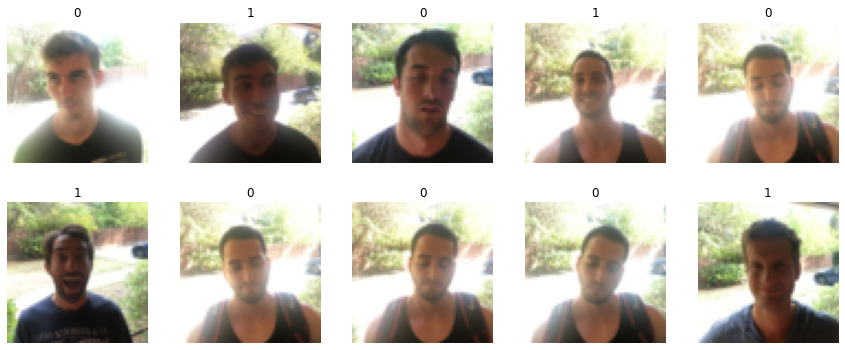

In [3]:
m = X_train.shape[0]

fig, axes = plt.subplots(2, 5, figsize=(12,5))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    index = np.random.randint(m)
    ax.imshow(X_train[index])
    ax.set_title(Y_train[index,0])
    ax.set_axis_off()

# TensorFlow - [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model)
* Ideal when each layer has 1 input and 1 output

### Creating CNN

In [4]:
model_seq = tf.keras.Sequential([
    ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3    
    tf.keras.layers.ZeroPadding2D(padding=3, input_shape=(64,64,3), data_format='channels_last'),
        
    ## Conv2D with 32 7x7 filters and stride of 1
    tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=1),
    
    ## BatchNormalization for axis 3    
    tf.keras.layers.BatchNormalization(),
        
    ## ReLU
    tf.keras.layers.ReLU(),
    
    ## Max Pooling 2D with default parameters    
    tf.keras.layers.MaxPool2D(),
    
    ## Flatten layer    
    tf.keras.layers.Flatten(),
    
    ## Dense layer with 1 unit for output & 'sigmoid' activation    
    tf.keras.layers.Dense(1, activation='sigmoid')    
    ])

model_seq.compile(optimizer='adam', 
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [5]:
model_seq.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 31ms/step - loss: 0.6412 - accuracy: 0.7583
Epoch 2/10
38/38 [==============================] - 1s 31ms/step - loss: 0.2658 - accuracy: 0.8950
Epoch 3/10
38/38 [==============================] - 1s 30ms/step - loss: 0.1634 - accuracy: 0.9283
Epoch 4/10
38/38 [==============================] - 1s 30ms/step - loss: 0.1745 - accuracy: 0.9250
Epoch 5/10
38/38 [==============================] - 1s 32ms/step - loss: 0.1210 - accuracy: 0.9583
Epoch 6/10
38/38 [==============================] - 1s 30ms/step - loss: 0.0892 - accuracy: 0.9667
Epoch 7/10
38/38 [==============================] - 1s 30ms/step - loss: 0.1425 - accuracy: 0.9467
Epoch 8/10
38/38 [==============================] - 1s 30ms/step - loss: 0.0665 - accuracy: 0.9717
Epoch 9/10
38/38 [==============================] - 1s 29ms/step - loss: 0.1149 - accuracy: 0.9550
Epoch 10/10
38/38 [==============================] - 1s 30ms/step - loss: 0.1502 - accuracy: 0.9483


In [6]:
model_seq.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 16ms/step - loss: 1.3243 - accuracy: 0.6467


[1.324273943901062, 0.6466666460037231]

In [7]:
y_pred = model_seq.predict(X_test)

5/5 [==============================] - 0s 17ms/step


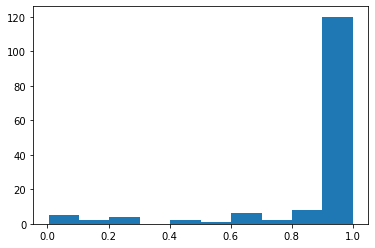

In [8]:
plt.hist(y_pred);

In [9]:
y_pred_class = y_pred.round().reshape(-1).astype(int)
print(y_pred_class.shape)
np.unique(y_pred_class, return_counts=True)

(150,)


(array([0, 1]), array([ 13, 137], dtype=int64))

### Performance on Test images

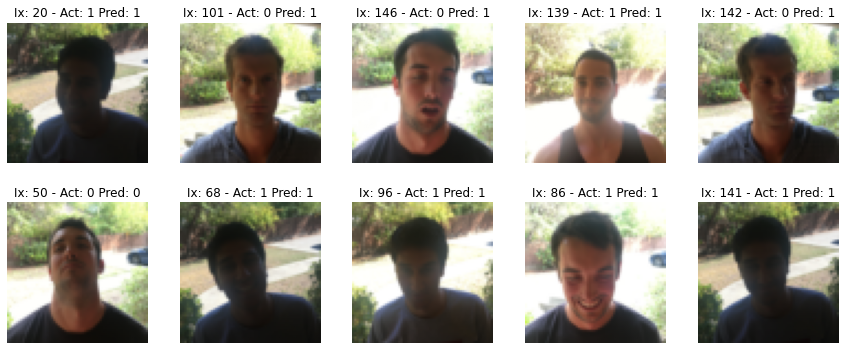

In [10]:
m = X_test.shape[0]

fig, axes = plt.subplots(2, 5, figsize=(12,5))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    index = np.random.randint(m)
    ax.imshow(X_test[index])
    ax.set_title("Ix: " + str(index) + " - Act: " + str(Y_test[index,0]) + " Pred: " + str(y_pred_class[index]))
    ax.set_axis_off()

# TensorFlow - [Functional API](https://www.tensorflow.org/guide/keras/functional)
* Models with non-linear topology, shared layers, and even multiple inputs or outputs

## Hand Signs dataset

In [11]:
train = h5py.File('data/train_signs.h5', "r")
X_train = np.array(train["train_set_x"][:])
Y_train_orig = np.array(train["train_set_y"][:])

test = h5py.File('data/test_signs.h5', "r")
X_test = np.array(test["test_set_x"][:])
Y_test_orig = np.array(test["test_set_y"][:])

classes = np.array(test["list_classes"][:])

X_train = X_train/255.
X_test  = X_test/255.

Y_train = np.eye(6)[Y_train_orig]
Y_test = np.eye(6)[Y_test_orig]

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [12]:
np.array(train["train_set_y"][:4])

array([5, 0, 2, 5], dtype=int64)

In [13]:
Y_train[:4]

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

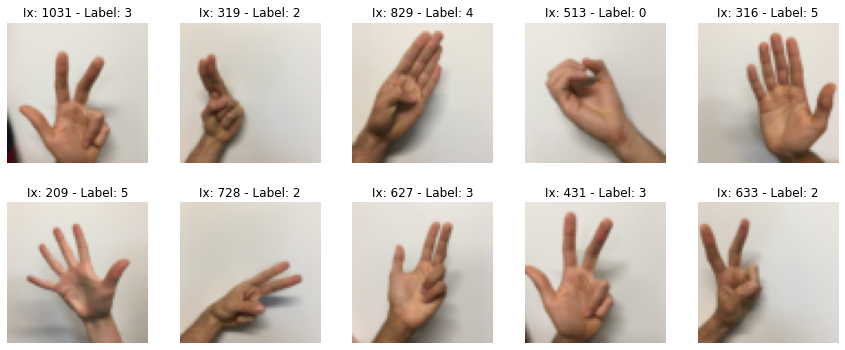

In [14]:
m = X_train.shape[0]

fig, axes = plt.subplots(2, 5, figsize=(12,5))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    index = np.random.randint(m)
    ax.imshow(X_train[index])
    ax.set_title("Ix: " + str(index) + " - Label: " + str(Y_train_orig[index]))
    ax.set_axis_off()

### Creating CNN

In [15]:
input_img = tf.keras.Input(shape=X_train.shape[1:])

## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4,4), strides=1, padding='same')(input_img)
A1 = tf.keras.layers.ReLU()(Z1)

## MAXPOOL: window 8x8, stride 8, padding 'SAME'
P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=8, padding='same')(A1)

## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=1, padding='same')(P1)
A2 = tf.keras.layers.ReLU()(Z2)

## MAXPOOL: window 4x4, stride 4, padding 'SAME'
P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4, padding='same')(A2)

## FLATTEN
F = tf.keras.layers.Flatten()(P2)
outputs = tf.keras.layers.Dense(6, activation='softmax')(F)

model_func = tf.keras.Model(inputs=input_img, outputs=outputs)

In [16]:
model_func.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [17]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

history = model_func.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
17/17 [==============================] - 1s 32ms/step - loss: 1.8751 - accuracy: 0.1667 - val_loss: 1.7922 - val_accuracy: 0.1917
Epoch 2/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7935 - accuracy: 0.1556 - val_loss: 1.7880 - val_accuracy: 0.2000
Epoch 3/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7862 - accuracy: 0.2269 - val_loss: 1.7824 - val_accuracy: 0.2250
Epoch 4/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7801 - accuracy: 0.2556 - val_loss: 1.7775 - val_accuracy: 0.2250
Epoch 5/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7753 - accuracy: 0.2435 - val_loss: 1.7695 - val_accuracy: 0.3417
Epoch 6/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7689 - accuracy: 0.3176 - val_loss: 1.7647 - val_accuracy: 0.3833
Epoch 7/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7605 - accuracy: 0.3019 - val_loss: 1.7542 - val_accuracy: 0.3667
Epoch 

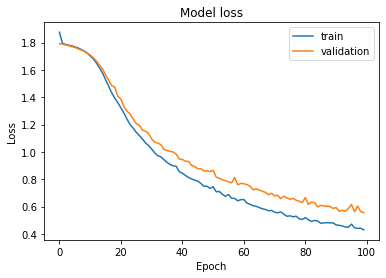

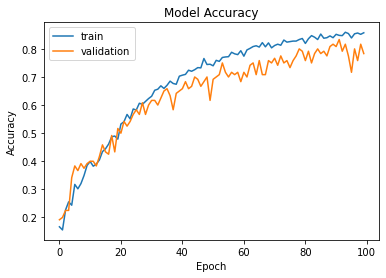

In [18]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']].rename(columns ={'loss':'train','val_loss':'validation'})
df_acc= df_loss_acc[['accuracy','val_accuracy']].rename(columns = {'accuracy':'train','val_accuracy':'validation'})

df_loss.plot(title='Model loss').set(xlabel='Epoch',ylabel='Loss');
df_acc.plot(title='Model Accuracy').set(xlabel='Epoch',ylabel='Accuracy');

### Performance on Test images

In [19]:
y_pred = model_func.predict(X_test)
y_pred_class = np.array([np.argmax(i) for i in y_pred])
# print(y_pred_class.shape)
# np.unique(y_pred_class, return_counts=True)

4/4 [==============================] - 0s 5ms/step


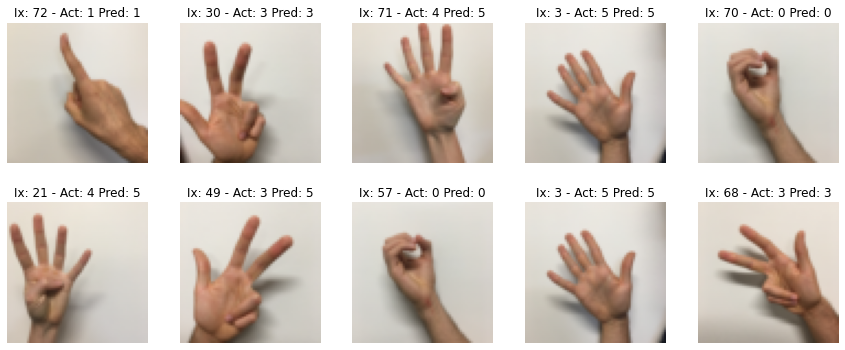

In [20]:
m = X_test.shape[0]

fig, axes = plt.subplots(2, 5, figsize=(12,5))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    index = np.random.randint(m)
    ax.imshow(X_test[index])
    ax.set_title("Ix: " + str(index) + " - Act: " + str(Y_test_orig[index]) + " Pred: " + str(y_pred_class[index]))
    ax.set_axis_off()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_orig, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.89      0.85      0.87        20
           2       0.79      0.75      0.77        20
           3       0.88      0.75      0.81        20
           4       0.73      0.55      0.63        20
           5       0.57      0.85      0.68        20

    accuracy                           0.78       120
   macro avg       0.80      0.78      0.79       120
weighted avg       0.80      0.78      0.79       120



## Intermediate output from Convolution Layer # 1 for a sample image

TensorShape([1, 64, 64, 8])

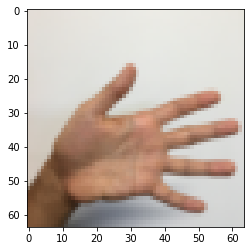

In [22]:
# https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction
im_ix = 0

plt.imshow(X_train[im_ix])

intermediate_layer_model = tf.keras.Model(inputs=model_func.input,
                                          outputs=model_func.layers[1].output)
intermediate_output = intermediate_layer_model(X_train[im_ix].reshape(-1,64,64,3))

intermediate_output.shape

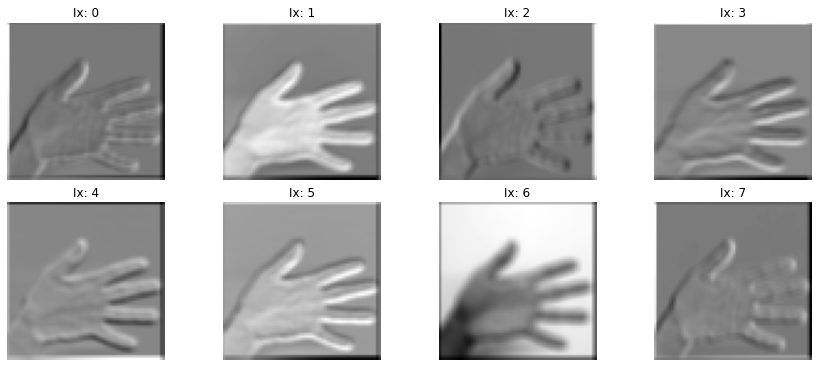

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(12,5))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    ax.imshow(intermediate_output[0,:,:,i], cmap='gray')
    ax.set_title("Ix: " + str(i))
    ax.set_axis_off()

## Intermediate output from Convolution Layer # 4 for a sample image

In [24]:
intermediate_layer_model = tf.keras.Model(inputs=model_func.input,
                                          outputs=model_func.layers[4].output)
intermediate_output = intermediate_layer_model(X_train[im_ix].reshape(-1,64,64,3))

intermediate_output.shape

TensorShape([1, 8, 8, 16])

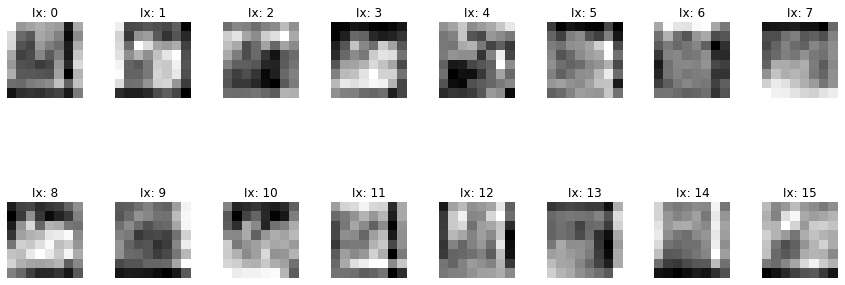

In [25]:
fig, axes = plt.subplots(2, 8, figsize=(12,5))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    ax.imshow(intermediate_output[0,:,:,i], cmap='gray')
    ax.set_title("Ix: " + str(i))
    ax.set_axis_off()

### Weights for the first Convolution layer

In [26]:
model_func.layers

In [27]:
model_func.layers[1].get_weights()[0].shape

(4, 4, 3, 8)

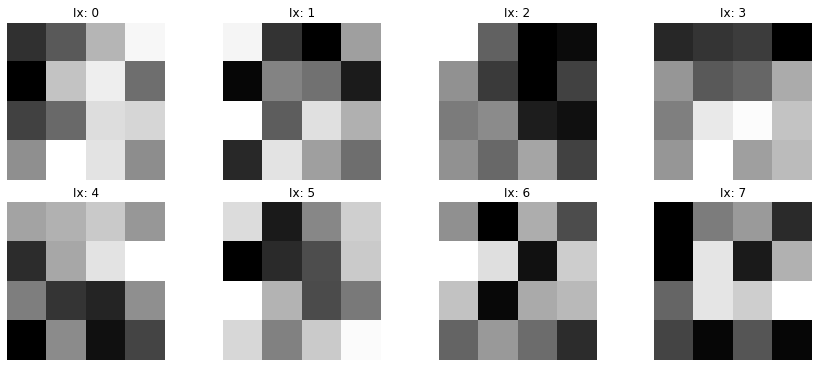

In [28]:
weights1 = model_func.layers[1].get_weights()[0]

fig, axes = plt.subplots(2, 4, figsize=(12,5))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    ax.imshow(((weights1[:,:,0,i]+0.5)*255).astype(np.uint8), cmap='gray')
    ax.set_title("Ix: " + str(i))
    ax.set_axis_off()

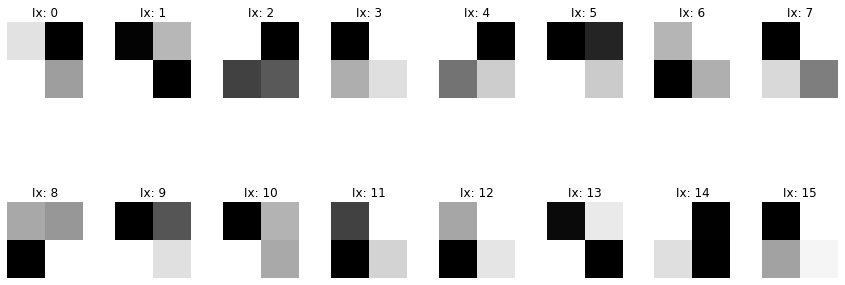

In [29]:
weights4 = model_func.layers[4].get_weights()[0]

fig, axes = plt.subplots(2, 8, figsize=(12,5))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    ax.imshow(((weights4[:,:,0,i]+0.5)*255).astype(np.uint8), cmap='gray')
    ax.set_title("Ix: " + str(i))
    ax.set_axis_off()